In [ ]:
!pip install metpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 368 kB 4.4 MB/s 
     |████████████████████████████████| 7.8 MB 97.5 MB/s 
     |████████████████████████████████| 9.4 MB 66.9 MB/s 
     |████████████████████████████████| 269 kB 78.7 MB/s 
     |████████████████████████████████| 295 kB 84.9 MB/s 
     |████████████████████████████████| 965 kB 72.9 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
!pip install boto3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 132 kB 4.7 MB/s 
     |████████████████████████████████| 79 kB 8.6 MB/s 
     |████████████████████████████████| 10.2 MB 43.6 MB/s 
     |████████████████████████████████| 140 kB 96.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.13 which is incompatible.


In [ ]:
import regex as re
import numpy 
import scipy
import pandas
from matplotlib import pyplot as plt 
from matplotlib import animation
#import netCDF4 as nc
#import pyart
import glob
from IPython import display
import os
from numpy import array
from numpy import hstack
from keras import Model
from keras.layers import Input
from keras.layers import Reshape
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers import GRU
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import RootMeanSquaredError
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import boto3
import botocore
from botocore.client import Config
from metpy.io import Level2File
from metpy.plots import add_timestamp, ctables
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from io import BytesIO

/usr/local/lib/python3.8/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [ ]:
def split_sequences(sequences, n_steps):
	x, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
		x.append(seq_x)
		y.append(seq_y)
	return array(x), array(y)

In [ ]:
ref_arr= numpy.load('ref_arr_KAMX20210701.npy')
ref_arr_2_final = np.nan_to_num(ref_arr)
X = ref_arr_2_final
X_org = X
X.shape

(234, 720, 1832)

#BASE CNN

(188, 5, 720, 1832) (188, 720, 1832)
(None, 1319040)
(235, 5, 720, 1832)
(235, 720, 1832)
Epoch 1/50
6/6 [==============================] - 14s 659ms/step - loss: 20.8331 - mse: 20.8331 - mae: 1.4849 - root_mean_squared_error: 4.5643 - val_loss: 22.9014 - val_mse: 22.9014 - val_mae: 1.6036 - val_root_mean_squared_error: 4.7856
Epoch 2/50
6/6 [==============================] - 2s 299ms/step - loss: 20.7802 - mse: 20.7802 - mae: 1.4963 - root_mean_squared_error: 4.5585 - val_loss: 22.8089 - val_mse: 22.8089 - val_mae: 1.6201 - val_root_mean_squared_error: 4.7759
Epoch 3/50
6/6 [==============================] - 2s 302ms/step - loss: 20.6806 - mse: 20.6806 - mae: 1.5164 - root_mean_squared_error: 4.5476 - val_loss: 22.6855 - val_mse: 22.6855 - val_mae: 1.6442 - val_root_mean_squared_error: 4.7629
Epoch 4/50
6/6 [==============================] - 2s 298ms/step - loss: 20.5477 - mse: 20.5477 - mae: 1.5445 - root_mean_squared_error: 4.5330 - val_loss: 22.5160 - val_mse: 22.5160 - val_mae: 1.

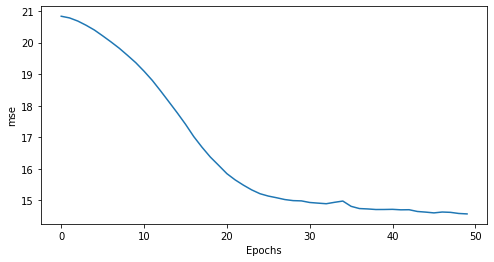

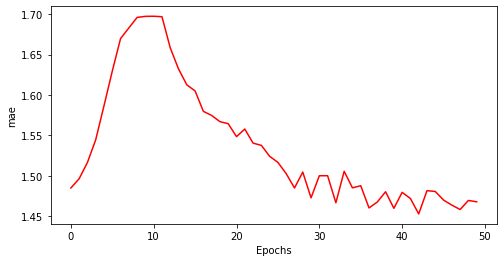

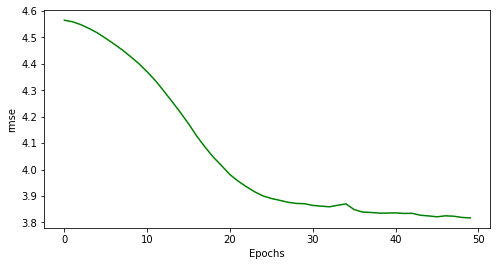

In [ ]:
n_steps = 5
X, y = split_sequences(X, n_steps)
X_train,X_rem,y_train,y_rem=train_test_split(X,y,test_size=0.2,random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_rem,y_rem, test_size=0.5)
print(X_train.shape, y_train.shape)
a, b = X, y

model_input = Input(shape=(n_steps, X.shape[2], X.shape[3]))
x = Conv2D(filters=64, kernel_size=2, activation='relu')(model_input)
x = MaxPooling2D(pool_size=2,padding='same')(x)
x = Conv2D(filters=64, kernel_size=2, activation='relu')(x)
x = MaxPooling2D(pool_size=2,padding='same')(x)
x = Conv2D(filters=64, kernel_size=2, activation='relu',padding='same')(x)
x = MaxPooling2D(pool_size=2,padding='same')(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Reshape((90,64))(x)
x = Dense(50, activation='relu')(x)

output = Dense(X.shape[2]*X.shape[3])(x)
print(output.get_shape())
model = Model(inputs=model_input, outputs=output)

model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', RootMeanSquaredError()])
print(X.shape)
print(y.shape)
y = y.reshape((y.shape[0], y.shape[1]*y.shape[2]))
y_val = y_val.reshape((y_val.shape[0], y_val.shape[1]*y_val.shape[2]))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1]*y_train.shape[2]))

# fit model
history = model.fit(X_train, y_train,batch_size=32, epochs=50, verbose=1, validation_data =(X_val,y_val))

yhat = model.predict(X_train, verbose=0)
yhat = numpy.around(yhat, decimals=2)
print(yhat.shape)


r2 = r2_score(y_train, yhat)
mae=mean_absolute_error(y_train, yhat)
mse=mean_squared_error(y_train, yhat)
rmse=mean_squared_error(y_train, yhat, squared=False)
print(r2,mae,mse,rmse)

plt.figure(figsize=(8,4))
plt.plot(history.history['mse'])
plt.xlabel('Epochs')
plt.ylabel('mse')
plt.show()
plt.figure(figsize=(8,4))
plt.plot(history.history['mae'],'r')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.show()
plt.figure(figsize=(8,4))
plt.plot(history.history['root_mean_squared_error'],'g')
plt.xlabel('Epochs')
plt.ylabel('rmse')
plt.show()

In [ ]:
model.save("step5_1.h5")

#CNN-FT

In [ ]:
ref_arr= numpy.load('ref_arr_KLIX20210701.npy')
ref_arr_2_final = np.nan_to_num(ref_arr)
X = ref_arr_2_final
X_org = X
X.shape

(256, 720, 1832)

(204, 5, 720, 1832) (204, 720, 1832)
(None, 1319040)
(256, 5, 720, 1832)
(256, 720, 1832)
Epoch 1/50
7/7 [==============================] - 12s 526ms/step - loss: 15.8348 - mse: 15.8348 - mae: 1.5538 - root_mean_squared_error: 3.9793 - val_loss: 14.9121 - val_mse: 14.9121 - val_mae: 1.4694 - val_root_mean_squared_error: 3.8616
Epoch 2/50
7/7 [==============================] - 2s 274ms/step - loss: 15.1802 - mse: 15.1802 - mae: 1.5191 - root_mean_squared_error: 3.8962 - val_loss: 14.8288 - val_mse: 14.8288 - val_mae: 1.5511 - val_root_mean_squared_error: 3.8508
Epoch 3/50
7/7 [==============================] - 2s 281ms/step - loss: 14.9246 - mse: 14.9246 - mae: 1.5203 - root_mean_squared_error: 3.8632 - val_loss: 14.4663 - val_mse: 14.4663 - val_mae: 1.4529 - val_root_mean_squared_error: 3.8035
Epoch 4/50
7/7 [==============================] - 2s 276ms/step - loss: 14.7526 - mse: 14.7526 - mae: 1.4701 - root_mean_squared_error: 3.8409 - val_loss: 14.3912 - val_mse: 14.3912 - val_mae: 1.

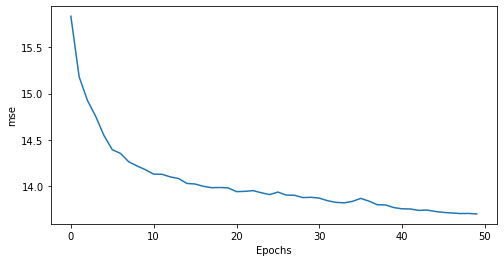

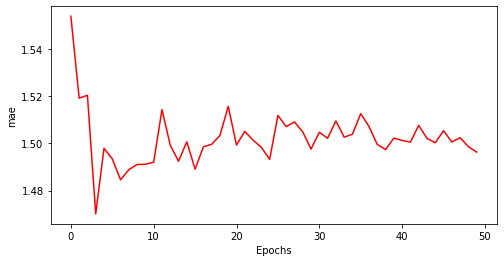

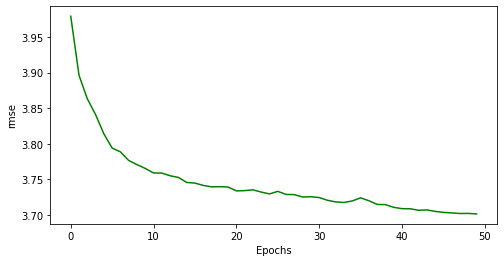

In [ ]:
n_steps = 5
X, y = split_sequences(X, n_steps)
X_train,X_rem,y_train,y_rem=train_test_split(X,y,test_size=0.2,random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_rem,y_rem, test_size=0.5)
print(X_train.shape, y_train.shape)
a, b = X, y

model_input = Input(shape=(n_steps, X.shape[2], X.shape[3]))
x = Conv2D(filters=64, kernel_size=2, activation='relu')(model_input)
x = MaxPooling2D(pool_size=2,padding='same')(x)
x = Conv2D(filters=64, kernel_size=2, activation='relu')(x)
x = MaxPooling2D(pool_size=2,padding='same')(x)
x = Conv2D(filters=64, kernel_size=2, activation='relu',padding='same')(x)
x = MaxPooling2D(pool_size=2,padding='same')(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Reshape((90,64))(x)
x = Dense(50, activation='relu')(x)

output = Dense(X.shape[2]*X.shape[3])(x)
print(output.get_shape())
model = Model(inputs=model_input, outputs=output)
model.load_weights("step5_1.h5") #Loading Weights trained in Miami Data
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', RootMeanSquaredError()])
print(X.shape)
print(y.shape)
y = y.reshape((y.shape[0], y.shape[1]*y.shape[2]))
y_val = y_val.reshape((y_val.shape[0], y_val.shape[1]*y_val.shape[2]))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1]*y_train.shape[2]))

# Fine Tuning it with New Orleans Data 
history = model.fit(X_train, y_train,batch_size=32, epochs=50, verbose=1, validation_data =(X_val,y_val))

# demonstrate prediction
yhat = model.predict(X_train, verbose=0)
yhat = numpy.around(yhat, decimals=2)
print(yhat.shape)

r2 = r2_score(y_train, yhat)
mae=mean_absolute_error(y_train, yhat)
mse=mean_squared_error(y_train, yhat)
rmse=mean_squared_error(y_train, yhat, squared=False)
print(r2,mae,mse,rmse)

plt.figure(figsize=(8,4))
plt.plot(history.history['mse'])
plt.xlabel('Epochs')
plt.ylabel('mse')
plt.show()
plt.figure(figsize=(8,4))
plt.plot(history.history['mae'],'r')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.show()
plt.figure(figsize=(8,4))
plt.plot(history.history['root_mean_squared_error'],'g')
plt.xlabel('Epochs')
plt.ylabel('rmse')
plt.show()

In [ ]:
model.save("step5_2.h5")

# CNN-GRU

(151, 5, 720, 1832) (151, 720, 1832)
(None, 1319040)
(189, 5, 720, 1832)
(189, 720, 1832)
Epoch 1/50
5/5 [==============================] - 10s 688ms/step - loss: 10.8289 - mse: 10.8289 - mae: 1.5825 - root_mean_squared_error: 3.2907 - val_loss: 9.8625 - val_mse: 9.8625 - val_mae: 1.5110 - val_root_mean_squared_error: 3.1405
Epoch 2/50
5/5 [==============================] - 1s 297ms/step - loss: 9.9096 - mse: 9.9096 - mae: 1.5164 - root_mean_squared_error: 3.1480 - val_loss: 9.4059 - val_mse: 9.4059 - val_mae: 1.4739 - val_root_mean_squared_error: 3.0669
Epoch 3/50
5/5 [==============================] - 1s 294ms/step - loss: 9.5142 - mse: 9.5142 - mae: 1.4837 - root_mean_squared_error: 3.0845 - val_loss: 8.9799 - val_mse: 8.9799 - val_mae: 1.4329 - val_root_mean_squared_error: 2.9966
Epoch 4/50
5/5 [==============================] - 1s 289ms/step - loss: 9.1457 - mse: 9.1457 - mae: 1.4499 - root_mean_squared_error: 3.0242 - val_loss: 8.6886 - val_mse: 8.6886 - val_mae: 1.4062 - val_roo

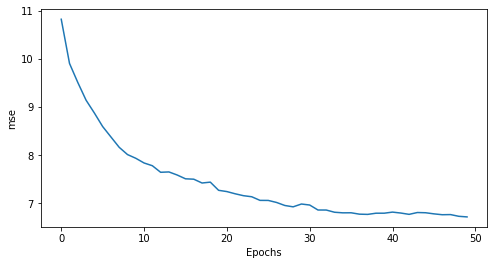

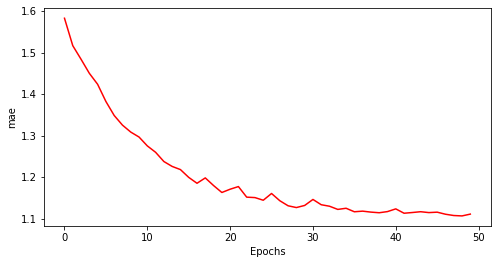

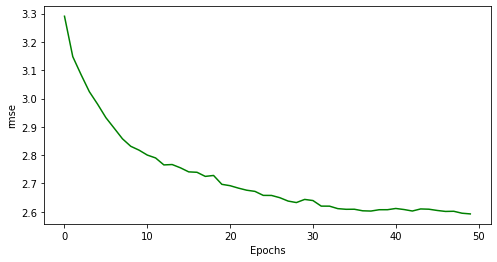

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5, 720, 1832)]    0         
                                                                 
 conv2d (Conv2D)             (None, 4, 719, 64)        469056    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 360, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 1, 359, 64)        16448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 180, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 180, 64)        16448 

In [ ]:
n_steps = 5
X, y = split_sequences(X, n_steps)
X_train,X_rem,y_train,y_rem=train_test_split(X,y,test_size=0.2,random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_rem,y_rem, test_size=0.5)
print(X_train.shape, y_train.shape)
a, b = X, y

model_input = Input(shape=(n_steps, X.shape[2], X.shape[3]))
x = Conv2D(filters=64, kernel_size=2, activation='relu')(model_input)
x = MaxPooling2D(pool_size=2,padding='same')(x)
x = Conv2D(filters=64, kernel_size=2, activation='relu')(x)
x = MaxPooling2D(pool_size=2,padding='same')(x)
x = Conv2D(filters=64, kernel_size=2, activation='relu',padding='same')(x)
x = MaxPooling2D(pool_size=2,padding='same')(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Reshape((90,64))(x)
x = GRU(32,return_sequences=True)(x)
x = GRU(16)(x)
x = Dense(50, activation='relu')(x)

output = Dense(X.shape[2]*X.shape[3])(x)
print(output.get_shape())
model = Model(inputs=model_input, outputs=output)
model.load_weights("step5_2.h5") #Loading Weights of CNN-Fine Tuned Model
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', RootMeanSquaredError()])
print(X.shape)
print(y.shape)
y = y.reshape((y.shape[0], y.shape[1]*y.shape[2]))
y_val = y_val.reshape((y_val.shape[0], y_val.shape[1]*y_val.shape[2]))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1]*y_train.shape[2]))

# Fitting CNN-GRU Model for the New Orleans Data
history = model.fit(X_train, y_train,batch_size=32, epochs=50, verbose=1, validation_data =(X_val,y_val))

yhat = model.predict(X_train, verbose=0)
yhat = numpy.around(yhat, decimals=2)
print(yhat.shape)

r2 = r2_score(y_train, yhat)
mae=mean_absolute_error(y_train, yhat)
mse=mean_squared_error(y_train, yhat)
rmse=mean_squared_error(y_train, yhat, squared=False)
print(r2,mae,mse,rmse)

plt.figure(figsize=(8,4))
plt.plot(history.history['mse'])
plt.xlabel('Epochs')
plt.ylabel('mse')
plt.show()
plt.figure(figsize=(8,4))
plt.plot(history.history['mae'],'r')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.show()
plt.figure(figsize=(8,4))
plt.plot(history.history['root_mean_squared_error'],'g')
plt.xlabel('Epochs')
plt.ylabel('rmse')
plt.show()
model.summary()

In [ ]:
model.save("step5_3.h5")